<a href="https://colab.research.google.com/github/manojvardhan8/houseprice_prediction/blob/main/HousePrice_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction using Linear regression


Lets import the modules which are necessary for house price predictions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


Dataset used by this model is california_housing

In [3]:
hd=datasets.fetch_california_housing()
dataframe=pd.DataFrame(hd.data,columns=hd.feature_names)# converting to the pandas dataframe
dataframe['prices']=pd.Series(hd.target)
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Let's see what are the features in the above datasets

In [ ]:
print(dataframe.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'prices'],
      dtype='object')


finding the correlation between the features of the dataset.
repersenting using heatmap

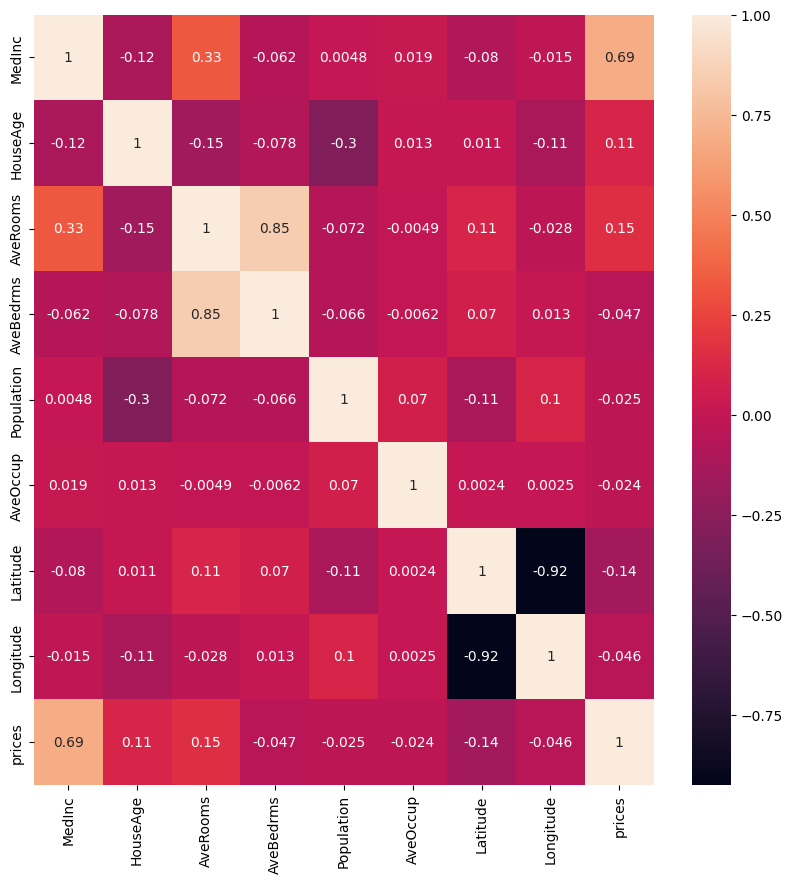

In [ ]:
  plt.figure(figsize=(10,10))
  sns.heatmap(dataframe.corr(),annot=True,cbar=True)
  plt.show()

By seeing the above heatmap we came to known that
feature MedInc is highly correlated to the price(label).
Now splitting the dataset into train and test dataset.

In [4]:
train,test=train_test_split(dataframe,test_size=0.2)
x_train=train.drop('prices',axis=1)
y_train=train['prices']
x_test=test.drop('prices',axis=1)
y_test=test['prices']

Now creating Linear model and training the model training dataset.

In [5]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Now,predict the prices for testing data set

In [6]:
predicted_values_for_train=model.predict(x_train)
predicted_values_for_test=model.predict(x_test)

plotting the graph actual prices vs predicted prices

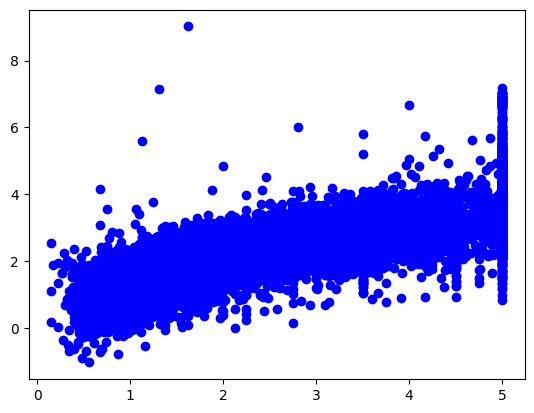

In [7]:
plt.scatter(y_train,predicted_values_for_train,color='blue')
plt.show()

finding mean absolute error and r2 score on both training and testing data set.

In [8]:
print(mean_absolute_error(y_train,predicted_values_for_train)) #training
print(r2_score(y_train,predicted_values_for_train))

0.5307904556483709
0.6065469462224229


In [9]:
print(mean_absolute_error(y_test,predicted_values_for_test)) #testing
print(r2_score(y_test,predicted_values_for_test))

0.5321717288089655
0.6046304375773079
